In [53]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [59]:
def generate_data(start, end, num_samples):
    x = np.linspace(start, end, num_samples)
    y = np.exp(x) + x
    x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    return x_tensor, y_tensor


# 生成数据
x_tensor, y_tensor = generate_data(0, 5, 10000)
# 划分数据
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.3, random_state=123)

# 对训练集和测试集进行排序
x_train, indices_train = torch.sort(x_train, dim=0)
y_train = y_train[indices_train.squeeze()]

x_test, indices_test = torch.sort(x_test, dim=0)
y_test = y_test[indices_test.squeeze()]
print(x_test)

tensor([[1.5002e-03],
        [2.0002e-03],
        [3.0003e-03],
        ...,
        [4.9955e+00],
        [4.9975e+00],
        [4.9985e+00]])


In [60]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [65]:
model = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(model, optimizer, criterion, x_train, y_train, epochs=1000):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(x_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item()}")

train(model, optimizer, criterion, x_train, y_train)


Epoch 0: Loss = 2499.89111328125
Epoch 100: Loss = 80.66412353515625
Epoch 200: Loss = 8.507135391235352
Epoch 300: Loss = 2.2252936363220215
Epoch 400: Loss = 0.9056885242462158
Epoch 500: Loss = 0.4659261405467987
Epoch 600: Loss = 0.27365508675575256
Epoch 700: Loss = 0.18583543598651886
Epoch 800: Loss = 0.11703123152256012
Epoch 900: Loss = 0.08396528661251068


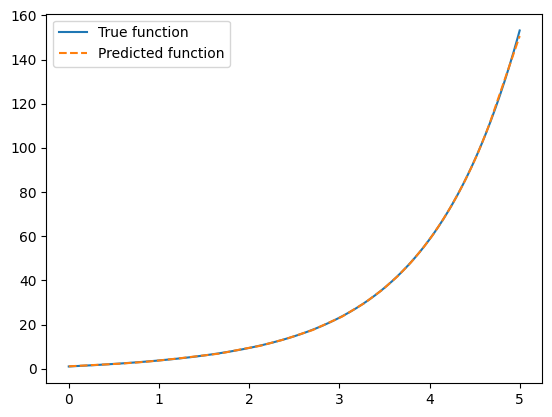

In [66]:
def evaluate(model, x_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(x_test)
    plt.plot(x_test.numpy(), y_test.numpy(), label='True function')
    plt.plot(x_test.numpy(), predictions.numpy(), label='Predicted function', linestyle='--')
    plt.legend()
    plt.show()

evaluate(model, x_test, y_test)
